In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mateuszbuda/lgg-mri-segmentation")

print("Path to dataset files:", path)

/home/judy/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 714M/714M [00:09<00:00, 75.8MB/s] 


Extracting files...
Path to dataset files: /home/judy/.cache/kagglehub/datasets/mateuszbuda/lgg-mri-segmentation/versions/2


In [2]:
!mv /home/judy/.cache/kagglehub/datasets/mateuszbuda/lgg-mri-segmentation/versions/2 datasets/

In [1]:
!python3 inference.py --help

usage: inference.py [-h] [--device DEVICE] [--batch-size BATCH_SIZE] --weights
                    WEIGHTS [--images IMAGES] [--image-size IMAGE_SIZE]
                    [--predictions PREDICTIONS] [--figure FIGURE]

Inference for segmentation of brain MRI

options:
  -h, --help            show this help message and exit
  --device DEVICE       device for training (default: cuda:0)
  --batch-size BATCH_SIZE
                        input batch size for training (default: 32)
  --weights WEIGHTS     path to weights file
  --images IMAGES       root folder with images
  --image-size IMAGE_SIZE
                        target input image size (default: 256)
  --predictions PREDICTIONS
                        folder for saving images with prediction outlines
  --figure FIGURE       filename for DSC distribution figure


In [4]:
!python3 inference.py --images datasets/2/lgg-mri-segmentation/kaggle_3m --weights weights/unet.pt

reading validation images...
preprocessing validation volumes...
cropping validation volumes...
padding validation volumes...
resizing validation volumes...
normalizing validation volumes...
done creating validation dataset
/home/judy/code/brain-segmentation-pytorch/inference.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` 

Results will be saved at `predictions`

In [5]:
# test_id
sample_id = "TCGA_CS_4944_20010208"
# find the image files in the prediction folder
!ls predictions/{sample_id}*

predictions/TCGA_CS_4944_20010208-00.png
predictions/TCGA_CS_4944_20010208-01.png
predictions/TCGA_CS_4944_20010208-02.png
predictions/TCGA_CS_4944_20010208-03.png
predictions/TCGA_CS_4944_20010208-04.png
predictions/TCGA_CS_4944_20010208-05.png
predictions/TCGA_CS_4944_20010208-06.png
predictions/TCGA_CS_4944_20010208-07.png
predictions/TCGA_CS_4944_20010208-08.png
predictions/TCGA_CS_4944_20010208-09.png
predictions/TCGA_CS_4944_20010208-10.png
predictions/TCGA_CS_4944_20010208-11.png
predictions/TCGA_CS_4944_20010208-12.png
predictions/TCGA_CS_4944_20010208-13.png
predictions/TCGA_CS_4944_20010208-14.png
predictions/TCGA_CS_4944_20010208-15.png
predictions/TCGA_CS_4944_20010208-16.png
predictions/TCGA_CS_4944_20010208-17.png


In [ ]:
# display the image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import os
import gui

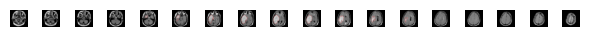

In [10]:
import os
import SimpleITK as sitk
import gui  # Assuming this is your visualization library

# Function to display images
def disp_images(images, fig_size, wl_list=None):
    """
    Display a list of 2D or 3D images using a GUI library.
    :param images: List of images to display.
    :param fig_size: Tuple specifying the figure size.
    :param wl_list: Optional list of window-level settings.
    """
    if images[0].GetDimension() == 2:
        gui.multi_image_display2D(
            image_list=images, figure_size=fig_size, window_level_list=wl_list
        )
    else:
        gui.MultiImageDisplay(
            image_list=images, figure_size=fig_size, window_level_list=wl_list
        )

# Path to the folder containing prediction images
sample_id = "TCGA_CS_4944_20010208"
folder_path = "predictions/"

# Get all image files related to the sample ID
files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if sample_id in f])

# Load all the image files into SimpleITK.Image objects
data = []
for file in files:
    image = sitk.ReadImage(file)  # Read the image using SimpleITK
    data.append(image)

# Display the images with specified figure size
disp_images(data, fig_size=(6, 2))
